In [9]:
# Das Notebook basiert auf diesem Turoial:
# https://www.analyticsvidhya.com/blog/2019/09/step-by-step-deep-learning-tutorial-video-classification-python/

# Frames classification model

In [3]:
#imports
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [4]:
# read in csv with labels for training frames
train = pd.read_csv('input/task2_training_frames_labels.csv', sep=';')
train.head()

,framename,isAirframe
0,_8Vy3dlHg2w_00132.mp4_0001.0.jpg,True
1,_8Vy3dlHg2w_00132.mp4_0002.0.jpg,True
2,_8Vy3dlHg2w_00132.mp4_0003.0.jpg,True
3,_8Vy3dlHg2w_00132.mp4_0004.0.jpg,True
4,_8Vy3dlHg2w_00132.mp4_0005.0.jpg,True


In [ ]:
# reading in all the training frames and saving them to a numpy array

# creating an empty list
train_image = []

# for loop to read and store frames
for i in tqdm(range(train.shape[0])):
    # loading the image using a standard image size (224, 224, 3), not the original image size
    img = image.load_img('/home/dl3/task2_trainingFrames/'+train['framename'][i], target_size=(224, 224, 3))
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

In [7]:
# creating train and test set

# separating the target
y = train['isAirframe']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [8]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

### Defining the architecture of the model

In [ ]:
# creating the base model of the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

In [ ]:
print(base_model.summary())

In [11]:
%%time
# extracting features for training frames

X_train = base_model.predict(X_train)
X_train.shape

CPU times: user 52.1 s, sys: 23.5 s, total: 1min 15s
Wall time: 1min 3s


(28130, 7, 7, 512)

In [12]:
%%time
# extracting features for validation frames

X_test = base_model.predict(X_test)
X_test.shape

CPU times: user 13.6 s, sys: 5.33 s, total: 18.9 s
Wall time: 14.9 s


(7033, 7, 7, 512)

In [13]:
# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(28130, 7*7*512)
X_test = X_test.reshape(7033, 7*7*512)

In [14]:
%%time
# normalizing the pixel values

max = X_train.max()
X_train = X_train/max
X_test = X_test/max

CPU times: user 645 ms, sys: 260 ms, total: 905 ms
Wall time: 925 ms


In [15]:
# shape of images
X_train.shape

(28130, 25088)

In [16]:
# defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [18]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight_v1.2.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [19]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

### Training the model

In [20]:
%%time
# training the model 

version_2 = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=128)

Epoch 1/50
220/220 [==============================] - 3s 13ms/step - loss: 0.0822 - accuracy: 0.9678 - val_loss: 0.0279 - val_accuracy: 0.9891
Epoch 2/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 3/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0323 - accuracy: 0.9886 - val_loss: 0.0233 - val_accuracy: 0.9905
Epoch 4/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0298 - accuracy: 0.9894 - val_loss: 0.0219 - val_accuracy: 0.9923
Epoch 5/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0266 - accuracy: 0.9897 - val_loss: 0.0206 - val_accuracy: 0.9926
Epoch 6/50
220/220 [==============================] - 5s 22ms/step - loss: 0.0225 - accuracy: 0.9914 - val_loss: 0.0185 - val_accuracy: 0.9930
Epoch 7/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0238 - accuracy: 0.9911 - val_loss: 0.0228 - val_accuracy: 0.9916

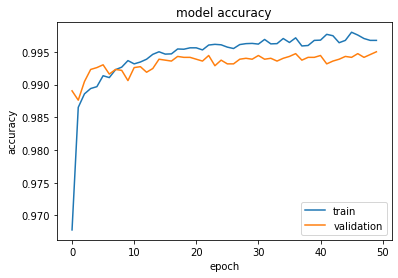

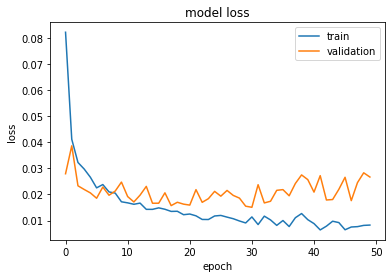

In [22]:
# plot training history
#  "Accuracy"
plt.plot(version_2.history['accuracy'])
plt.plot(version_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# "Loss"
plt.plot(version_2.history['loss'])
plt.plot(version_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
model.evaluate(X_train, y_train)

880/880 [==============================] - 3s 3ms/step - loss: 0.0018 - accuracy: 0.9996


[0.0018455011304467916, 0.9996445178985596]

In [24]:
acc = version_2.history['accuracy']
np.amax(acc)

0.9980092644691467

In [25]:
from sklearn.metrics import classification_report
print("[INFO] evaluating network...")
y_test_numeric = y_test.rename(columns={"False": 0, "True": 1})
predictions = model.predict(x=X_test, batch_size=128)
print(classification_report(y_test_numeric.idxmax(axis="columns").values,
                            predictions.argmax(axis=1), target_names=['False', 'True']))

[INFO] evaluating network...
              precision    recall  f1-score   support

        True       0.99      0.98      0.99      1567
       False       1.00      1.00      1.00      5466

    accuracy                           1.00      7033
   macro avg       0.99      0.99      0.99      7033
weighted avg       1.00      1.00      1.00      7033



# Evaluating the frames classification model

## Defining model architecture and loading weights

In [1]:
# imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
import cv2
import math
import os
from glob import glob
from scipy import stats as s

In [2]:
# base pretrained model
base_model = VGG16(weights='imagenet', include_top=False)

In [3]:
# defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [4]:
# loading the trained weights
model.load_weights("weight_v1.2.hdf5")

In [5]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

## Generating predictions for all test frames

In [6]:
# reading in test labels for verification later
train = pd.read_csv('input/task2_test_frames_labels_all_videos.csv', sep=';')

# creating the dummy tags
trainLabel = pd.read_csv('input/task2_training_frames_labels.csv', sep=';')
y = trainLabel['isAirframe']
y = pd.get_dummies(y)

In [7]:
print(y)

       False  True 
0          0      1
1          0      1
2          0      1
3          0      1
4          0      1
...      ...    ...
35158      1      0
35159      1      0
35160      1      0
35161      1      0
35162      1      0

[35163 rows x 2 columns]


# Evaluate model by looking at frame prediction

In [8]:
# creating two lists to store predicted and actual tags
predictFrame = []
actualFrame = []  

# reading actual labels from the .csv file
train = pd.read_csv('input/task2_test_frames_labels_all_videos.csv', sep=';')

# open all frames and convert to np array
prediction_images = []

# loading the images and using a standard image size (224, 224, 3)
for i in tqdm(range(train.shape[0])):
    framename = train['framename'][i]
    images = glob("input/test_frames_all_videos/*.jpg")
    img = image.load_img('input/test_frames_all_videos/'+train['framename'][i], target_size=(224, 224, 3))
    img = image.img_to_array(img)
    img = img/225
    prediction_images.append(img)
    actualFrame.append(train['isAirframe'].loc[train['framename'] == framename].values[0])
    
# converting all the frames for a test video into numpy array
prediction_images = np.array(prediction_images)
    
# extracting features using pre-trained model
prediction_images = base_model.predict(prediction_images)
    
# converting features in one dimensional array
prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)
    
# predicting tags for each array
#prediction = model.predict_classes(prediction_images)
prediction = (model.predict(prediction_images) > 0.5).astype("int32")
for pre in prediction:
    if pre[0] == 1:
        predictFrame.append(False)
    elif pre[1] == 1:
        predictFrame.append(True)


100%|██████████| 11710/11710 [05:30<00:00, 35.39it/s]


In [9]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predictFrame, actualFrame)*100

97.33561058923996

In [35]:
predictFrame

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [36]:
actualFrame

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [10]:
# checking predicted and actual frames labels which dont match
count_correct = 0
count_false = 0
for i in range(0, len(predictFrame)):
    if predictFrame[i] == actualFrame[i]:
        count_correct +=1
    else:
        print('frame ' + str(i),predictFrame[i], actualFrame[i])
        #print(frameName[i])
        count_false +=1

test_acc = (count_correct / (count_correct + count_false)) *100
print('Test Accuracy {:.2f}%'.format(test_acc))

frame 129 False True
frame 232 True False
frame 349 True False
frame 510 True False
frame 511 True False
frame 512 True False
frame 513 True False
frame 514 True False
frame 683 True False
frame 684 True False
frame 850 True False
frame 971 True False
frame 972 True False
frame 1094 True False
frame 1185 True False
frame 1186 True False
frame 1187 True False
frame 1311 True False
frame 1312 True False
frame 1492 True False
frame 1493 True False
frame 1494 True False
frame 1495 True False
frame 1558 True False
frame 1559 True False
frame 1560 True False
frame 1561 True False
frame 1562 True False
frame 1635 True False
frame 1636 True False
frame 1793 True False
frame 1794 True False
frame 1795 True False
frame 2066 True False
frame 2067 True False
frame 2068 True False
frame 2204 True False
frame 2274 True False
frame 2368 True False
frame 2369 True False
frame 2370 True False
frame 2371 True False
frame 2485 True False
frame 2627 True False
frame 2628 True False
frame 2629 True False
f